### Week 3- Summarising data ( second genre classifier used)
- Using '10,000 Data about movies (1915 - 2023)' dataset found on kaggle (https://www.kaggle.com/datasets/willianoliveiragibin/10000-data-about-movies-1915-2023)
- Code adadpted from https://git.arts.ac.uk/lmccallum/Intro-to-ds-23-24/blob/master/intro-to-ds-week-3.ipynb


In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [87]:
df = pd.read_csv('data/movie-data.csv').set_index("Movie Name")
df

,Unnamed: 0,Year of Release,Run Time in minutes,Movie Rating,Votes,MetaScore,Gross,Genre,Certification,Director,Stars,Description
Movie Name,,,,,,,,,,,,
The Shawshank Redemption,0,1994,142,9.3,2804443,82.0,28340000.0,['Drama'],R,['Frank Darabont'],"['Tim Robbins', 'Morgan Freeman', 'Bob Gunton'...","['Over', 'the', 'course', 'of', 'several', 'ye..."
The Godfather,1,1972,175,9.2,1954174,100.0,134970000.0,"['Crime', ' Drama']",R,['Francis Ford Coppola'],"['Marlon Brando', 'Al Pacino', 'James Caan', '...","['Don', 'Vito', 'Corleone,', 'head', 'of', 'a'..."
Ramayana: The Legend of Prince Rama,2,1993,135,9.2,12995,NaN,NaN,"['Animation', ' Action', ' Adventure']",PG,"['Ram Mohan', 'Yûgô Sakô', 'Koichi Saski']","['Arun Govil', 'Nikhil Kapoor', 'Edie Mirman',...","['An', 'anime', 'adaptation', 'of', 'the', 'Hi..."
The Chaos Class,3,1975,87,9.2,42231,NaN,NaN,"['Comedy', ' Drama']",NaN,['Ertem Egilmez'],"['Kemal Sunal', 'Münir Özkul', 'Halit Akçatepe...","['Lazy,', 'uneducated', 'students', 'share', '..."
The Dark Knight,4,2008,152,9.0,2786129,84.0,534860000.0,"['Action', ' Crime', ' Drama']",PG-13,['Christopher Nolan'],"['Christian Bale', 'Heath Ledger', 'Aaron Eckh...","['When', 'the', 'menace', 'known', 'as', 'the'..."
...,...,...,...,...,...,...,...,...,...,...,...,...
Golmaal Again,9995,2017,140,4.9,10183,NaN,1010000.0,"['Action', ' Comedy', ' Fantasy']",Not Rated,['Rohit Shetty'],"['Ajay Devgn', 'Arshad Warsi', 'Tabu', 'Shreya...","['The', 'gang', 'encounters', 'with', 'some', ..."
Not to Forget,9996,2021,84,4.9,11191,NaN,NaN,['Drama'],NaN,['Valerio Zanoli'],"['Karen Grassle', 'Louis Gossett Jr.', ""Tatum ...","['After', 'a', 'lifetime', 'of', 'scams,', 'a'..."
Housefull 3,9997,2016,140,4.9,10308,NaN,1160000.0,"['Action', ' Comedy', ' Romance']",Not Rated,"['Sajid', 'Farhad Samji']","['Akshay Kumar', 'Abhishek Bachchan', 'Riteish...","['A', 'father', ""doesn't"", 'want', 'his', 'thr..."


In [88]:
# what are the different genres available in the file?
df['Genre'].unique() 

array(["['Drama']", "['Crime', ' Drama']",
       "['Animation', ' Action', ' Adventure']", "['Comedy', ' Drama']",
       "['Action', ' Crime', ' Drama']",
       "['Biography', ' Drama', ' History']",
       "['Action', ' Adventure', ' Drama']",
       "['Crime', ' Mystery', ' Thriller']", "['Adventure', ' Drama']",
       "['Animation', ' Action', ' Fantasy']",
       "['Action', ' Adventure', ' Biography']", "['Comedy']",
       "['Action', ' Adventure', ' Sci-Fi']", "['Drama', ' Romance']",
       "['Adventure', ' Western']", "['Crime', ' Drama', ' Mystery']",
       "['Action', ' Crime', ' Thriller']",
       "['Adventure', ' Comedy', ' Drama']",
       "['Comedy', ' Horror', ' Mystery']",
       "['Comedy', ' Family', ' Mystery']",
       "['Adventure', ' Drama', ' Sci-Fi']",
       "['Biography', ' Crime', ' Drama']", "['Action', ' Sci-Fi']",
       "['Action', ' Adventure', ' Fantasy']",
       "['Biography', ' Drama', ' Music']", "['Biography', ' Drama']",
       "['Action', 

There are 425 variations of arrays within the genre column.

In [89]:
# How many of each unique genre are there in the dataset?
df['Genre'].value_counts()

Genre
['Comedy', ' Drama', ' Romance']    481
['Drama']                           429
['Comedy', ' Drama']                406
['Drama', ' Romance']               347
['Action', ' Crime', ' Drama']      324
                                   ... 
['Thriller', ' War']                  1
['Romance', ' Thriller', ' War']      1
['Adventure', ' Family']              1
['Drama', ' Horror', ' Western']      1
['Mystery', ' Sci-Fi']                1
Name: count, Length: 425, dtype: int64

 Each film has other classifying categories, not just a singular, which would create problems when plotting for movie rating and genre. 

In [90]:
# Create 'Second Genre' containing the second value from the 'Genre' column, if no second item in string, use the first.
# Code adapted from : https://stackoverflow.com/questions/54532210/pandas-apply-split-and-concatenation-using-lambda-in-a-column
# Code debugged using GPT to fix the if statement, including the first genres. I wanted to avoid unknown or missing values.
df['Second Genre'] = df['Genre'].apply(lambda x: x.split(',')[1].strip() if len(x.split(',')) > 1 else x.split(',')[0].strip())

# Clean unwanted symbols and white spaces from the new column
df['Second Genre'] = df['Second Genre'].fillna('').astype(str).str.replace('[\[\]\'\s]', '', regex=True)


In [96]:
# What does the dataframe look like?
df

,Year of Release,Run Time in minutes,Movie Rating,Votes,Genre,Second Genre
Movie Name,,,,,,
The Shawshank Redemption,1994,142,9.3,2804443,['Drama'],Drama
The Godfather,1972,175,9.2,1954174,"['Crime', ' Drama']",Drama
Ramayana: The Legend of Prince Rama,1993,135,9.2,12995,"['Animation', ' Action', ' Adventure']",Action
The Chaos Class,1975,87,9.2,42231,"['Comedy', ' Drama']",Drama
The Dark Knight,2008,152,9.0,2786129,"['Action', ' Crime', ' Drama']",Crime
...,...,...,...,...,...,...
Golmaal Again,2017,140,4.9,10183,"['Action', ' Comedy', ' Fantasy']",Comedy
Not to Forget,2021,84,4.9,11191,['Drama'],Drama
Housefull 3,2016,140,4.9,10308,"['Action', ' Comedy', ' Romance']",Comedy


In [97]:
# Reduce the df to main columns for insights and ensure NaN values are removed ( helps when plotting with matplot.lib)
df = df[['Year of Release','Run Time in minutes','Movie Rating','Votes','Genre','Second Genre']].dropna()
df

,Year of Release,Run Time in minutes,Movie Rating,Votes,Genre,Second Genre
Movie Name,,,,,,
The Shawshank Redemption,1994,142,9.3,2804443,['Drama'],Drama
The Godfather,1972,175,9.2,1954174,"['Crime', ' Drama']",Drama
Ramayana: The Legend of Prince Rama,1993,135,9.2,12995,"['Animation', ' Action', ' Adventure']",Action
The Chaos Class,1975,87,9.2,42231,"['Comedy', ' Drama']",Drama
The Dark Knight,2008,152,9.0,2786129,"['Action', ' Crime', ' Drama']",Crime
...,...,...,...,...,...,...
Golmaal Again,2017,140,4.9,10183,"['Action', ' Comedy', ' Fantasy']",Comedy
Not to Forget,2021,84,4.9,11191,['Drama'],Drama
Housefull 3,2016,140,4.9,10308,"['Action', ' Comedy', ' Romance']",Comedy


# Movie rating by genre
I set out to create a side-by-side histogram for the movie ratings by genre data which allows for a clearer comparison of movie ratings across different genres. 
Each genre is represented by a different color, and the side-by-side layout helps to avoid overlapping the genres in the visualization.
While the data shows higher ratings for Comedy, Action, Drama, Crime, Biography


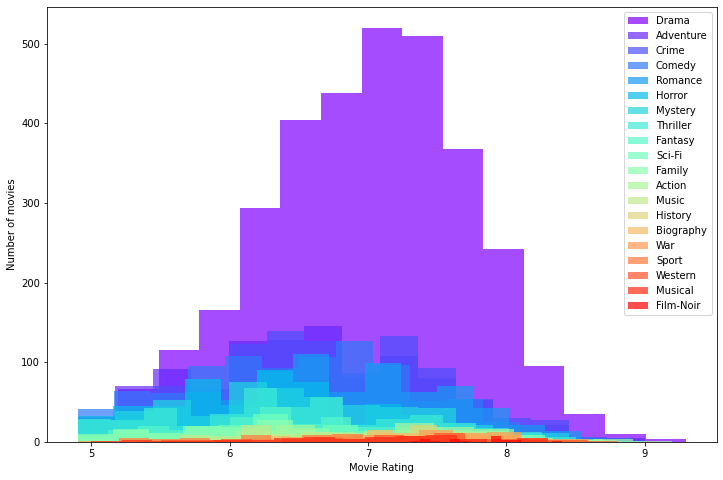

In [98]:
# Get the first of each unique genres and their counts
unique_genres_counts = df['Second Genre'].value_counts()

# Plot results for each genre with rainbow colors
fig, ax = plt.subplots(figsize=(12, 8))
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_genres_counts)))

for i, (genre, count) in enumerate(unique_genres_counts.items()):
    # Filter DataFrame for movies belonging to the current genre
    genre_df = df[df['Second Genre'] == genre]
    
    # Plot histogram for movie ratings of the current genre with a different color
    ax.hist(genre_df['Movie Rating'], bins=number_of_bins, label=genre, alpha=0.7, color=colors[i])

ax.set_ylabel("Number of movies")
ax.set_xlabel("Movie Rating")
ax.legend()
plt.show()

The differentiation between each of the genres was difficult to work out using 'plt.cm.rainbow', instead, i opted for a categorical colour palette (Seaborn)which assigns distinct colors to each genre.
Additionally, I wanted to combine the data from multiple histograms for each genre into a single visualization , which could provide a clearer and more concise representation of the movie ratings by genre. 
I opted for a violin plot instead of a histogram.

In [ ]:
musical_data = np.where(df['Second Genre'] == 'Musical', 1, 0)
music_data = np.where(df['Second Genre'] == 'Music', 1, 0)
history_data = np.where(df['Second Genre'] == 'History', 1, 0)

# Sum the occurrences of each category
musical_count = np.sum(musical_data) # https://www.geeksforgeeks.org/numpy-sum-in-python/
music_count = np.sum(music_data)
history_count = np.sum(history_data)

print('Musical count:', musical_count)
print('Music count:', music_count)
print('History count:', history_count)

Musical count: 54
Music count: 136
History count: 99


# Central tendancy 
- Continuation from week 3 class tasks
- Work out the mean, median and mode for each genre category
- Work out the mean, median and mode for all movie rating data

In [101]:
mean_ratings = df.groupby('Second Genre')['Movie Rating'].mean()
mean_ratings

Second Genre
Action       7.061594
Adventure    6.570136
Biography    7.184270
Comedy       6.511323
Crime        6.714141
Drama        6.975364
Family       6.558794
Fantasy      6.476125
Film-Noir    7.780952
History      7.079798
Horror       6.279928
Music        6.774265
Musical      6.983333
Mystery      6.470209
Romance      6.709314
Sci-Fi       6.483417
Sport        6.655882
Thriller     6.449565
War          7.360256
Western      7.225862
Name: Movie Rating, dtype: float64

In [102]:
median_ratings = df.groupby('Second Genre')['Movie Rating'].median()
median_ratings

Second Genre
Action       7.20
Adventure    6.60
Biography    7.20
Comedy       6.50
Crime        6.70
Drama        7.00
Family       6.40
Fantasy      6.40
Film-Noir    7.90
History      7.30
Horror       6.20
Music        6.75
Musical      7.15
Mystery      6.40
Romance      6.70
Sci-Fi       6.40
Sport        6.70
Thriller     6.40
War          7.45
Western      7.30
Name: Movie Rating, dtype: float64

In [106]:
mode_ratings = df.groupby('Second Genre')['Movie Rating'].apply(lambda x: x.mode().iloc[0])
mode_ratings

Second Genre
Action       7.2
Adventure    6.1
Biography    7.1
Comedy       7.0
Crime        6.1
Drama        7.3
Family       6.3
Fantasy      6.4
Film-Noir    7.9
History      7.3
Horror       6.2
Music        6.2
Musical      7.5
Mystery      6.2
Romance      6.7
Sci-Fi       6.3
Sport        6.7
Thriller     6.1
War          7.7
Western      7.6
Name: Movie Rating, dtype: float64

In [107]:
from collections import Counter
# Calculate mean, median and mode for all data as one
mean_rating = np.mean(df['Movie Rating'])
median_rating = np.median(df['Movie Rating'])
mode_rating = Counter(df['Movie Rating']).most_common(1)[0][0]

print("Mean Rating:", mean_rating)
print("Median Rating:", median_rating)
print("Mode Rating:", mode_rating)

Mean Rating: 6.7270199999999996
Median Rating: 6.7
Mode Rating: 6.7


In [108]:
# Aggregate data from items in same categories
grouped = df.groupby('Second Genre')

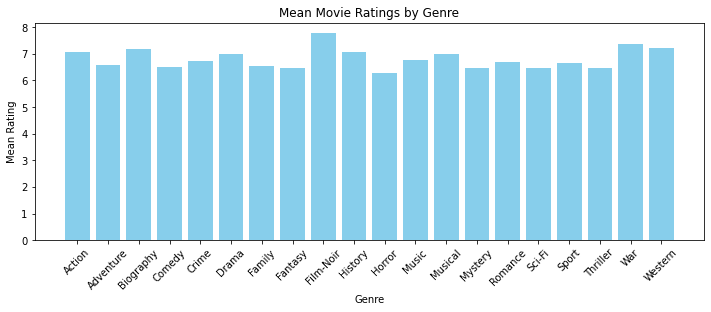

In [109]:
fig, ax = plt.subplots(figsize=(12, 4))
ax.bar(mean_ratings.index, mean_ratings, color='skyblue')
ax.set_ylabel("Mean Rating")
ax.set_xlabel("Genre")
ax.set_title("Mean Movie Ratings by Genre")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

The graph shows that...
- Western and Film-Noir had the highest movie ratings than the rest. 
- Fantasy, Horror and History scored the lowest mean rating at around 6 out of 10.


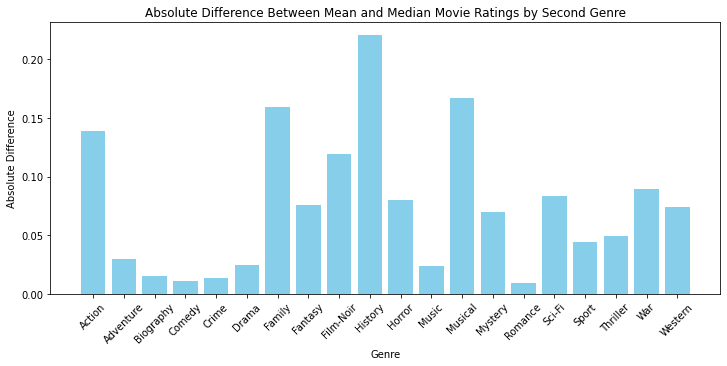

In [111]:
# Task 1; work out the absolute difference between the mean and median movie rating for each genre as a bar chart.

# calculate the absolute difference
abs_diff = np.abs(mean_ratings - median_ratings)

# Create a bar chart to visualize the absolute differences
fig, ax = plt.subplots(figsize=(12, 5))
ax.bar(abs_diff.index, abs_diff, color='skyblue')
ax.set_ylabel("Absolute Difference")
ax.set_xlabel("Genre")
ax.set_title("Absolute Difference Between Mean and Median Movie Ratings by Second Genre")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

# Standard deviation

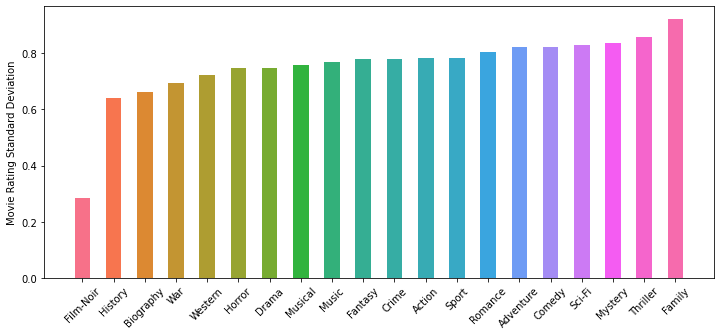

In [113]:
# Get standard deviation from grouped items
std_ratings = df.groupby('Second Genre')['Movie Rating'].std().sort_values()

# Define a color palette for the bar plot
colors = sns.color_palette("husl", len(std_ratings))

# Plot
fig, ax = plt.subplots(figsize=(12, 5))
ax.set_ylabel("Movie Rating Standard Deviation")
ax.bar(std_ratings.index, std_ratings, 0.5, color=colors)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

The standard deviation shows the amount of variation within each category. In this case, 'Mystery' genre had the highest data variation, while 'Musical' had the lowest. It is also important to note that these values were previously rounded to the nearest integer using np.floor(), so the confidence percentasge that the data is completely true may be reduced.

# Z scores for movie ratings
- Calculation of how many standard deviations a measurement is from the mean 

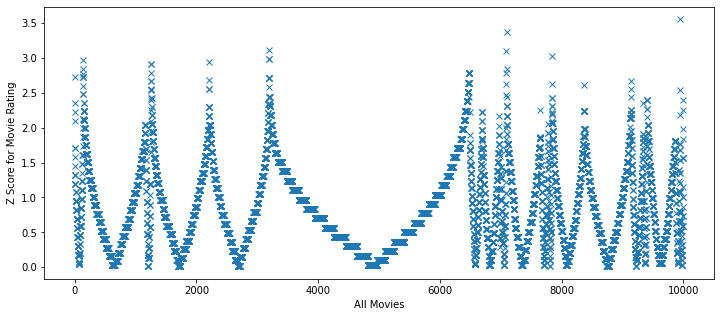

In [114]:
z_scores = []
for genre in mean_ratings.index:
    mean = mean_ratings.loc[genre]
    std = std_ratings.loc[genre]
    group = df[df['Second Genre'] == genre]
    dist = np.abs(group['Movie Rating'] - mean) / std
    z_scores.extend(dist)

# Plot the z-scores
fig, ax = plt.subplots(figsize=(12, 5))
ax.set_ylabel("Z Score for Movie Rating")
ax.set_xlabel("All Movies")
ax.plot(z_scores, "x")
plt.show()

In [124]:
z_scores = []
for genre in mean_ratings.index:
    mean = mean_ratings.loc[genre]
    std = std_ratings.loc[genre]
    group = df[df['Second Genre'] == genre]
    dist = np.abs(group['Movie Rating'] - mean) / std
    z_scores.extend(dist)

df['zscore'] = z_scores

In [123]:
# Task 2; print out the movie names whose movie ratings are more than 3 standard deviations ( z score higher than 3) from the mean
    # Filter the DataFrame based on z-scores higher than 3
for i,zscore in enumerate(df["zscore"]):
    if zscore > 3:
        print(df.iloc[i].name)


A Fantastic Woman
No Strings Attached
The Hating Game
Shazam! Fury of the Gods
Seed of Chucky


# Confidence intervals

In [126]:
confidence_intervals = []
num_samples = 100
z = 1.96  # Z-score for 95% confidence interval

for genre in mean_ratings.index:
    # Get mean for genre
    mean = mean_ratings.loc[genre]
    
    # Get standard deviation for genre
    std = std_ratings.loc[genre]
    
    # Calculate confidence range
    dist = z * (std / np.sqrt(num_samples))
    
    print(genre, np.round(mean, 1), "+-", np.round(dist, 3))
    confidence_intervals.append([dist, dist])

Action 7.1 +- 0.153
Adventure 6.6 +- 0.161
Biography 7.2 +- 0.129
Comedy 6.5 +- 0.161
Crime 6.7 +- 0.152
Drama 7.0 +- 0.146
Family 6.6 +- 0.18
Fantasy 6.5 +- 0.152
Film-Noir 7.8 +- 0.056
History 7.1 +- 0.126
Horror 6.3 +- 0.146
Music 6.8 +- 0.15
Musical 7.0 +- 0.148
Mystery 6.5 +- 0.164
Romance 6.7 +- 0.157
Sci-Fi 6.5 +- 0.163
Sport 6.7 +- 0.153
Thriller 6.4 +- 0.168
War 7.4 +- 0.136
Western 7.2 +- 0.142


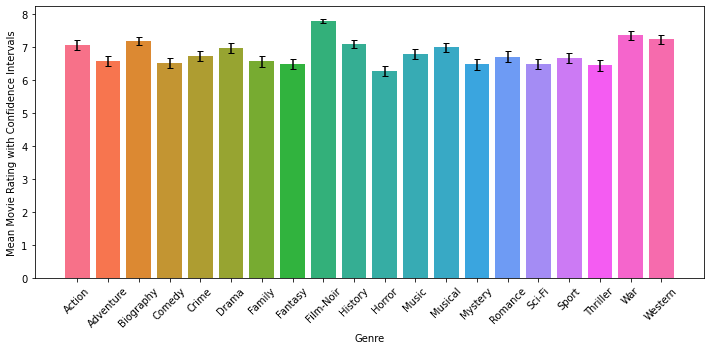

In [127]:
# Plot confidence intervals on the mean movie rating
fig, ax = plt.subplots(figsize=(12, 5))
ax.bar(mean_ratings.index, mean_ratings, color=colors) # all defined above
ax.errorbar(mean_ratings.index, mean_ratings, yerr=np.array(confidence_intervals).T, fmt='none', ecolor='black', capsize=3) #https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.errorbar.html
ax.set_ylabel("Mean Movie Rating with Confidence Intervals")
ax.set_xlabel("Genre")
plt.xticks(rotation=45) # rotate the labels for better visualisation
plt.show()


In [129]:
# code adapted from: https://datagy.io/python-correlation-matrix/ 
# correlation coefficient between 'Votes' and 'Movie Rating' to quantify the relationship:
correlation = df['Votes'].corr(df['Movie Rating']) 
print("Correlation between Number of Votes and Movie Rating:", correlation)

Correlation between Number of Votes and Movie Rating: 0.3091738597007562


In [130]:
# Calculate summary statistics for each variable by genre
# Code adapted from: https://stackoverflow.com/questions/24203136/pandas-dataframe-groupby-displaying-group-statistics
summary_stats = df.groupby('Second Genre').agg({'Votes': ['mean', 'median', 'std'],
                                               'Movie Rating': ['mean', 'median', 'std'],
                                               'Year of Release': ['min', 'max']})

print(summary_stats)


                      Votes                          Movie Rating         \
                       mean    median            std         mean median   
Second Genre                                                               
Action         90361.579710   31184.5  140656.807579     7.061594   7.20   
Adventure     190271.385214  100190.0  258466.170181     6.570136   6.60   
Biography      97990.415730   48364.0  128003.044654     7.184270   7.20   
Comedy         87706.474074   38586.0  134546.027852     6.511323   6.50   
Crime          82760.242424   33117.5  160728.465459     6.714141   6.70   
Drama          77828.126214   27796.5  167615.505846     6.975364   7.00   
Family        102114.060302   40696.0  152898.791959     6.558794   6.40   
Fantasy        87914.228374   39545.0  127082.508800     6.476125   6.40   
Film-Noir      54216.142857   33944.0   59316.485153     7.780952   7.90   
History        45740.232323   22409.0   59827.833265     7.079798   7.30   
Horror      